In [423]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [298]:
traindata = pd.read_csv('train.csv')
testdata = pd.read_csv('test.csv')
mergeData = [traindata, testdata]

In [354]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null int64
Fare        891 non-null int64
Embarked    891 non-null int64
Titles      891 non-null int64
Alone       891 non-null int64
dtypes: int64(8)
memory usage: 55.8 KB


In [355]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null int64
Age         418 non-null int64
Fare        418 non-null int64
Embarked    418 non-null int64
Titles      418 non-null int64
Alone       418 non-null int64
dtypes: int64(7)
memory usage: 22.9 KB


# 1.Get Titles: based on name(human view)

In [301]:
import re

def title(Name):
    getTitle = re.search('([A-Za-z]+)\.',Name)
    
    if getTitle:
        return getTitle.group(1)
    return ""

for data in mergeData:
    data['Titles'] = data['Name'].apply(title)

crosstabTrain = pd.crosstab(traindata['Titles'], traindata['Sex'])
crosstabTest = pd.crosstab(testdata['Titles'], testdata['Sex'])

# check if there two sex in one title

In [302]:
crosstabTrain[(crosstabTrain.female != 0) & (crosstabTrain.male !=0)]

Sex,female,male
Titles,,
Dr,1,6


<font color ='red'><h2> title 'Dr' ada 2 sex </h2></font>

In [303]:
crosstabTest[(crosstabTest.female != 0) & (crosstabTest.male !=0)]

Sex,female,male
Titles,,


## MALE

In [304]:
crosstabTest.loc[crosstabTest.male != 0, 'male'].sort_values(ascending=False)

Titles
Mr        240
Master     21
Rev         2
Col         2
Dr          1
Name: male, dtype: int64

In [305]:
# title di traindata sudah mewakili title di testdata
male = crosstabTrain.loc[crosstabTrain.male != 0, 'male'].sort_values(ascending=False)
male

Titles
Mr          517
Master       40
Rev           6
Dr            6
Major         2
Col           2
Sir           1
Jonkheer      1
Don           1
Capt          1
Name: male, dtype: int64

In [306]:
#lihat persebaran umur untuk titles : Mr dan Master

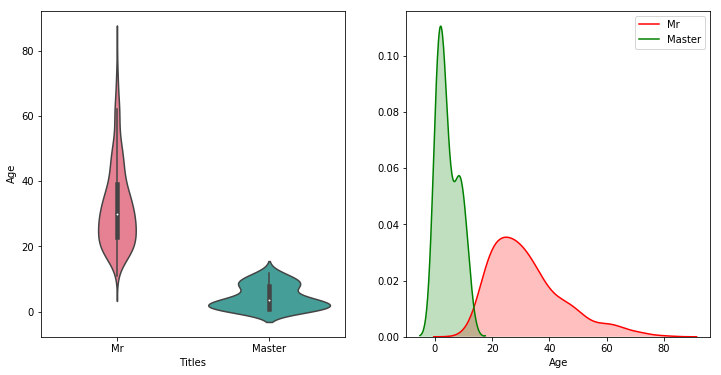

In [307]:
ManOld = traindata[['Titles','Age']][traindata.Titles.isin(['Mr','Master'])]

f,axes = plt.subplots(1,2, figsize=(12,6))
visManOld = sns.violinplot(data=ManOld, x='Titles', y='Age',ax=axes[0], palette="husl")


plt.rcParams['figure.figsize'] = 10,8
visMO1 = sns.distplot(ManOld[ManOld.Titles=='Mr'].Age, hist=False, kde_kws={"shade": True}, color="r", label ='Mr')
visMO1 = sns.distplot(ManOld[ManOld.Titles=='Master'].Age, hist=False, kde_kws={"shade": True}, color="g", label='Master')
visMO1.legend()

plt.show()

In [308]:
mr = ['Rev','Dr','Major', 'Col', 'Sir', 'Jonkheer', 'Don', 'Capt']
traindata[(traindata.Titles.isin(mr)) & (traindata.Age<=20)][['Titles','Age']]
#all of them greater than 20 y.o
# testdata[(testdata.Titles.isin(maleL)) & (testdata.Age<=20) ][['Titles','Age']]

,Titles,Age


In [309]:
for data in mergeData:
    data.loc[data.Titles.isin(mr) & (data.Sex == 'male'),'Titles'] = 'Mr'

In [310]:
#female Dr
traindata[traindata.Titles == 'Dr']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,Dr


## FEMALE

In [311]:
crosstabTest.loc[crosstabTest.female != 0, 'female'].sort_values(ascending=False)

Titles
Miss    78
Mrs     72
Ms       1
Dona     1
Name: female, dtype: int64

In [312]:
crosstabTrain.loc[crosstabTrain.female != 0, 'female'].sort_values(ascending=False)

Titles
Miss        182
Mrs         125
Mlle          2
Ms            1
Mme           1
Lady          1
Dr            1
Countess      1
Name: female, dtype: int64

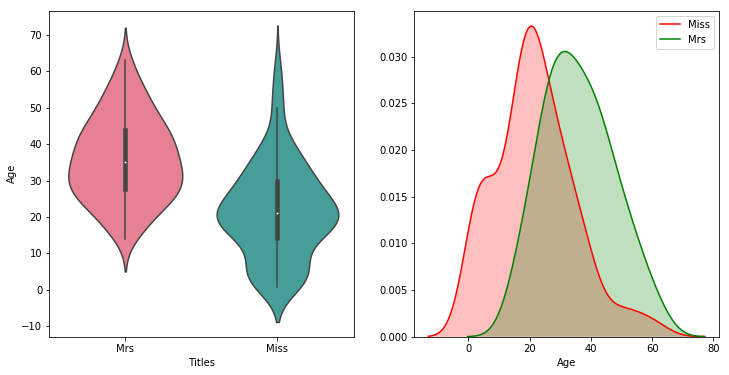

In [313]:
woman = traindata[['Titles','Age']][traindata.Titles.isin(['Miss','Mrs'])]

f,axes = plt.subplots(1,2, figsize=(12,6))
viswoman = sns.violinplot(data=woman, x='Titles', y='Age',ax=axes[0], palette="husl")


plt.rcParams['figure.figsize'] = 10,8
visMO2 = sns.distplot(woman[woman.Titles=='Miss'].Age, hist=False, kde_kws={"shade": True}, color="r", label ='Miss')
visMO2 = sns.distplot(woman[woman.Titles=='Mrs'].Age, hist=False, kde_kws={"shade": True}, color="g", label='Mrs')
visMO2.legend()

plt.show()

In [314]:
mrs = ['Mlle','Ms','Mme','Lady','Dr','Countess', 'Dona']
traindata[traindata.Titles.isin(mrs) & (traindata.Age <=20)][['Titles','Age']]
#All of them greater than 20 y.o
#testdata[testdata.Titles.isin(mrs) & (testdata.Age <=20)][['Titles','Age']]

,Titles,Age


In [315]:
for data in mergeData:
    data.loc[(data.Titles.isin(mrs))&(data.Sex == 'female'),'Titles'] = 'Mrs'
    # karena Dr ada yg cowo ada yg cewe

# 2.fillna Age: based on Titles

In [316]:
titles = ['Mr','Master','Mrs','Miss']
for title in titles:
    for data in mergeData:
        dt = data[data.Titles==title]

        ageAvg = dt.Age.mean()
        ageStd = dt.Age.std()
        ageMin = ageAvg-ageStd
        ageMax = ageAvg+ageStd
        numNull = data.Age.isnull().sum()

        ageRand = np.random.randint(ageMin,ageMax,size=numNull)
        data['Age'][np.isnan(data['Age'])] = ageRand
        #data['Age'] = data['Age'].astype('int')

In [317]:
# # 3.Get NEWTITLES: based on Age
# Mr & Mrs >20 <br>
# Master & Miss <= 20

In [318]:
# for data in mergeData:    
#     data.loc[(data.Age <= 20) & (data.Sex=='male'), 'NewTitles'] = 'Master'
#     data.loc[(data.Age <= 20) & (data.Sex=='female'), 'NewTitles'] = 'Miss'
#     data.loc[(data.Age > 20) & (data.Sex=='male'), 'NewTitles'] = 'Mr'
#     data.loc[(data.Age > 20) & (data.Sex=='female'), 'NewTitles'] = 'Mrs'

# 3. Alone or not alone

In [319]:
for data in mergeData:
    data.loc[(data.SibSp == 0) & (data.Parch == 0), 'Alone'] = 1
    data.loc[data.Alone.isnull(), 'Alone'] = 0 
    data.Alone = data.Alone.astype('int')

# 4. fillna fare : based on Pclass
there is correlation between Fare & Pclass

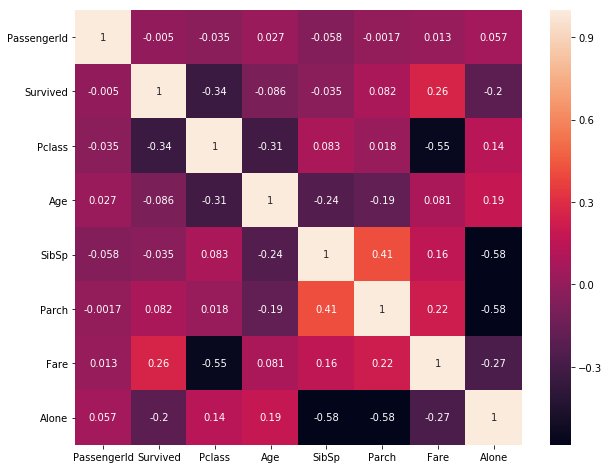

In [320]:
sns.heatmap(traindata.corr(),annot=True)
plt.show()

In [321]:
Pclass = list(traindata.Pclass.unique())
for pc in Pclass:
    for data in mergeData:
        df = data[data.Pclass == pc]
        
        fareAvg = df.Fare.mean()
        fareStd = df.Fare.std()
        fareMin = fareAvg-fareStd
        fareMax = fareAvg+fareStd
        numNull = data.Fare.isnull().sum()
        
        fareRand = np.random.randint(fareMin,fareMax,size=numNull)
        data['Fare'][np.isnan(data['Fare'])] = fareRand

# 5. fillna Embarked: based on mode    

In [340]:
for data in mergeData:
    data.loc[data.Embarked.isnull(),'Embarked'] = 'S'

# CLEANING 

In [343]:
dropColumns = ['PassengerId','Name','SibSp','Parch','Ticket','Cabin']
for data in mergeData:
    data.drop(dropColumns, axis=1,inplace=True)

# CATEGORICAL & ONEHOTENCODER

In [344]:
testdata.Titles.unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [345]:
testdata[testdata.Titles=='Dona']

,Pclass,Sex,Age,Fare,Embarked,Titles,Alone


In [346]:
traindata.head(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,Titles,Alone
0,0,3,male,22.0,7.2500,S,Mr,0
1,1,1,female,38.0,71.2833,C,Mrs,0
2,1,3,female,26.0,7.9250,S,Miss,1
3,1,1,female,35.0,53.1000,S,Mrs,0
4,0,3,male,35.0,8.0500,S,Mr,1


In [347]:
# data['Sex'] = data['Sex'].map({'female':0,'male':1}).astype('int')
# data['Titles'] = data['Titles'].map({'Mr':0, 'Mrs':1, 'Miss':2, 'Master':3})
# data['Embarked'] = data['Embarked'].map({'S':0, 'C':1, 'Q':2})

# Age Interval

In [348]:
splitAge = traindata.copy()
splitAge['Age'] = pd.cut(traindata['Age'], 5)
splitAge.groupby('Age').count()

,Survived,Pclass,Sex,Fare,Embarked,Titles,Alone
Age,,,,,,,
"(0.34, 16.336]",100,100,100,100,100,100,100
"(16.336, 32.252]",445,445,445,445,445,445,445
"(32.252, 48.168]",266,266,266,266,266,266,266
"(48.168, 64.084]",69,69,69,69,69,69,69
"(64.084, 80.0]",11,11,11,11,11,11,11


# Fare Interval

In [349]:
splitFare = traindata.copy()
splitFare['Fare'] = pd.qcut(traindata['Fare'], 6)
splitFare.groupby('Fare').count()

,Survived,Pclass,Sex,Age,Embarked,Titles,Alone
Fare,,,,,,,
"(-0.001, 7.775]",156,156,156,156,156,156,156
"(7.775, 8.662]",152,152,152,152,152,152,152
"(8.662, 14.454]",139,139,139,139,139,139,139
"(14.454, 26.0]",149,149,149,149,149,149,149
"(26.0, 52.369]",146,146,146,146,146,146,146
"(52.369, 512.329]",149,149,149,149,149,149,149


In [350]:
for data in mergeData:
    #AGE
    data.loc[data.Age <= 16.3, 'Age'] = 0
    data.loc[(data.Age >16.3) & (data.Age <= 32.3), 'Age'] = 1
    data.loc[(data.Age >32.3) & (data.Age <= 48.2), 'Age'] = 2
    data.loc[(data.Age >48.2) & (data.Age <= 64.1), 'Age'] = 3
    data.loc[data.Age > 64.1, 'Age'] = 4   
    
    #FARE
    data.loc[data.Fare <= 7.8, 'Fare'] = 0
    data.loc[(data.Fare > 7.8)&(data.Fare <= 8.7), 'Fare'] = 1
    data.loc[(data.Fare > 8.7)&(data.Fare <= 14.5), 'Fare'] = 2
    data.loc[(data.Fare > 14.5)&(data.Fare <= 26.0), 'Fare'] = 3
    data.loc[(data.Fare > 26.0)&(data.Fare <= 52.4), 'Fare'] = 4
    data.loc[(data.Fare > 52.4), 'Fare'] = 5
    
    data['Sex'] = data['Sex'].map({'female':0,'male':1}).astype('int')
    data['Titles'] = data['Titles'].map({'Mr':0, 'Mrs':1, 'Miss':2, 'Master':3})
    data['Embarked'] = data['Embarked'].map({'S':0, 'C':1, 'Q':2})
    
    data['Age'] = data['Age'].astype(int)
    data['Fare'] = data['Fare'].astype(int)
    data['Embarked'] = data['Embarked'].astype(int)

In [359]:
trainData = traindata[['Embarked','Titles','Pclass','Sex','Age','Fare','Alone','Survived']]
testData= testdata[['Embarked','Titles','Pclass','Sex','Age','Fare','Alone']]

In [360]:
trainData.to_csv('CleanTrain.csv',index=False)
testData.to_csv('CleanTest.csv', index=False)

# BACKWARD ELIMINATION
the optimum model, without Fare & Alone

In [403]:
# X = trainData.iloc[:,:-1]
# X.head(5)
# y = trainData.iloc[:,7:8].values

# import statsmodels.formula.api as sm
# X = np.append(arr = np.ones((891,1)).astype(int), values=X, axis=1)

In [404]:
# X_opt = X[:,[0,1,2,3,4,5,6,7]]
# cekOLS = sm.OLS(endog = y, exog=X_opt).fit()
# cekOLS.summary()

Embarked=1
Titles=2
Pclass=3
Sex=4
Age=5
-Fare=6
-Alone=7

# MACHINE LEARNING

In [524]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [525]:
X = trainData.iloc[:,:-1].values
y = trainData.iloc[:,7:8].values

In [526]:
X.shape

(891, 7)

In [527]:
X

array([[0, 0, 3, ..., 1, 0, 0],
       [1, 1, 1, ..., 2, 5, 0],
       [0, 2, 3, ..., 1, 1, 1],
       ...,
       [0, 2, 3, ..., 1, 3, 0],
       [1, 0, 1, ..., 1, 4, 1],
       [2, 0, 3, ..., 1, 0, 1]])

## OneHotEncoder Embarked

In [528]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X = LabelEncoder()
X[:,0] = labelencoder_X.fit_transform(X[:,0]) 
print(labelencoder_X.classes_)

[0 1 2]


In [529]:
### DUMMY variable to X categorical. 0,1,2 
#which is 2 !> 1 !> 0 
#specify the index of the columns tht is the col of the categorical var  
#with categorical_featur = [0]
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()

In [530]:
X

array([[1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 2., 5., 0.],
       [1., 0., 0., ..., 1., 1., 1.],
       ...,
       [1., 0., 0., ..., 1., 3., 0.],
       [0., 1., 0., ..., 1., 4., 1.],
       [0., 0., 1., ..., 1., 0., 1.]])

In [531]:
X.shape

(891, 9)

In [532]:
#AVOIDING DUMMY VAR TRAP
X = X[:,1:]

In [533]:
X

array([[0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 1., ..., 2., 5., 0.],
       [0., 0., 2., ..., 1., 1., 1.],
       ...,
       [0., 0., 2., ..., 1., 3., 0.],
       [1., 0., 0., ..., 1., 4., 1.],
       [0., 1., 0., ..., 1., 0., 1.]])

## OneHotEncoder Titles

In [534]:
X[:5,2] #cek ke df trainData. ini TitleS

array([0., 1., 2., 1., 0.])

In [535]:
labelencoder_X2 = LabelEncoder()
X[:,2] = labelencoder_X.fit_transform(X[:,2]) 
print(labelencoder_X.classes_)

[0. 1. 2. 3.]


In [536]:
X #liat X kolom 2. itu title

array([[0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 1., ..., 2., 5., 0.],
       [0., 0., 2., ..., 1., 1., 1.],
       ...,
       [0., 0., 2., ..., 1., 3., 0.],
       [1., 0., 0., ..., 1., 4., 1.],
       [0., 1., 0., ..., 1., 0., 1.]])

In [537]:
onehotencoder = OneHotEncoder(categorical_features = [2])
X = onehotencoder.fit_transform(X).toarray()

In [538]:
X[:5,0]

array([1., 0., 0., 0., 1.])

In [539]:
X.shape

(891, 11)

In [540]:
X

array([[1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 2., 5., 0.],
       [0., 0., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 1., ..., 1., 3., 0.],
       [1., 0., 0., ..., 1., 4., 1.],
       [1., 0., 0., ..., 1., 0., 1.]])

In [541]:
#AVOIDING DUMMY VAR TRAP
X = X[:,1:]

In [542]:
#KOLOM TITLES MAJU KEDEPAN
#3 kolom pertama milik Titles = (0-trap)1,2,3
#3 kolom selanjutnya milik Embarked = (0-trap),1,2

# kolom ke 1,2,3 = Title cat 1,2,3
# kolom ke 4,5 = Embarked cat 1,2

In [543]:
X

array([[0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 2., 5., 0.],
       [0., 1., 0., ..., 1., 1., 1.],
       ...,
       [0., 1., 0., ..., 1., 3., 0.],
       [0., 0., 0., ..., 1., 4., 1.],
       [0., 0., 0., ..., 1., 0., 1.]])

In [544]:
X.shape #(3 kolom tambahan->10)

(891, 10)

## Start Algorithm

In [545]:
X = np.c_[np.ones((X.shape[0])),X]
y = y
[m,n] = X.shape